# Multiple files with `pandas`

In [1]:
import numpy as np
import pandas as pd
import matplotlib

In [2]:
a_df = pd.DataFrame({
    'Country': ['Germany', 'France', 'Belgium', 'Finland'],
    'Population (M)': [82.8, 67.2, 11.4, 5.5],
    'Capital': ['Berlin', 'Paris', 'Brussels', 'Helsinki']
})
a_df

,Country,Population (M),Capital
0,Germany,82.8,Berlin
1,France,67.2,Paris
2,Belgium,11.4,Brussels
3,Finland,5.5,Helsinki


In [3]:
b_df = pd.DataFrame({
    'Country': ['Germany', 'France', 'Belgium', 'Canada'],
    'HDI': [0.936, 0.901, 0.916, 0.926]
})
b_df

,Country,HDI
0,Germany,0.936
1,France,0.901
2,Belgium,0.916
3,Canada,0.926


In [5]:
inner_merged_df = a_df.merge(b_df, on='Country')
inner_merged_df

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,0.936
1,France,67.2,Paris,0.901
2,Belgium,11.4,Brussels,0.916


In [9]:
left_merged_df = a_df.merge(b_df, how='left', on='Country')
left_merged_df

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,0.936
1,France,67.2,Paris,0.901
2,Belgium,11.4,Brussels,0.916
3,Finland,5.5,Helsinki,NaN


In [10]:
right_merged_df = a_df.merge(b_df, how='right', on='Country')
right_merged_df

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,0.936
1,France,67.2,Paris,0.901
2,Belgium,11.4,Brussels,0.916
3,Canada,NaN,NaN,0.926


In [11]:
outer_merged_df = a_df.merge(b_df, on='Country', how='outer')
outer_merged_df

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,0.936
1,France,67.2,Paris,0.901
2,Belgium,11.4,Brussels,0.916
3,Finland,5.5,Helsinki,NaN
4,Canada,NaN,NaN,0.926


In [12]:
outer_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         5 non-null      object 
 1   Population (M)  4 non-null      float64
 2   Capital         4 non-null      object 
 3   HDI             4 non-null      float64
dtypes: float64(2), object(2)
memory usage: 200.0+ bytes


In [13]:
aa_df = a_df.set_index("Country")
aa_df

,Population (M),Capital
Country,,
Germany,82.8,Berlin
France,67.2,Paris
Belgium,11.4,Brussels
Finland,5.5,Helsinki


In [14]:
bb_df = b_df.set_index("Country")
bb_df

,HDI
Country,
Germany,0.936
France,0.901
Belgium,0.916
Canada,0.926


In [15]:
aa_df.join(bb_df)

,Population (M),Capital,HDI
Country,,,
Germany,82.8,Berlin,0.936
France,67.2,Paris,0.901
Belgium,11.4,Brussels,0.916
Finland,5.5,Helsinki,NaN


In [17]:
aa_df.join(bb_df, how='inner')

,Population (M),Capital,HDI
Country,,,
Germany,82.8,Berlin,0.936
France,67.2,Paris,0.901
Belgium,11.4,Brussels,0.916


In [18]:
aa_df.join(bb_df, how='right')

,Population (M),Capital,HDI
Country,,,
Germany,82.8,Berlin,0.936
France,67.2,Paris,0.901
Belgium,11.4,Brussels,0.916
Canada,NaN,NaN,0.926


In [19]:
aa_df.join(bb_df, how='outer')

,Population (M),Capital,HDI
Country,,,
Belgium,11.4,Brussels,0.916
Canada,NaN,NaN,0.926
Finland,5.5,Helsinki,NaN
France,67.2,Paris,0.901
Germany,82.8,Berlin,0.936


In [20]:
concat_df = pd.concat([a_df, b_df], axis="index", sort=False)
concat_df

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,NaN
1,France,67.2,Paris,NaN
2,Belgium,11.4,Brussels,NaN
3,Finland,5.5,Helsinki,NaN
0,Germany,NaN,NaN,0.936
1,France,NaN,NaN,0.901
2,Belgium,NaN,NaN,0.916
3,Canada,NaN,NaN,0.926


In [21]:
!ls

Exercise.ipynb README.md      summer.csv     winter.csv
Makefile       dictionary.csv tests


In [41]:
countries_df = pd.read_csv('dictionary.csv', decimal=',')
countries_df

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081219966
1,Albania,ALB,2889167.0,3945.21758150914
2,Algeria,ALG,39666519.0,4206.03123244958
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN
...,...,...,...,...
196,Vietnam,VIE,91703800.0,2111.13802366815
197,Virgin Islands*,ISV,103574.0,NaN
198,Yemen,YEM,26832215.0,1406.2916511457
199,Zambia,ZAM,16211767.0,1304.87901447726


In [29]:
summer_df = pd.read_csv('summer.csv', decimal=',')
summer_df#.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [31]:
summer_df.rename(columns={"Country": "Code"}, inplace=True)

In [32]:
summer_df.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [35]:
winter_df = pd.read_csv('winter.csv', decimal=',')
winter_df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


In [37]:
winter_df.rename(columns={"Country": "Code"}, inplace=True)
winter_df.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


In [39]:
summer_countries_df = countries_df.merge(summer_df, on='Code')
summer_countries_df

,Country,Code,Population,GDP per Capita,Year,City,Sport,Discipline,Athlete,Gender,Event,Medal
0,Afghanistan,AFG,32526562.0,594.323081219966,2008,Beijing,Taekwondo,Taekwondo,"NIKPAI, Rohullah",Men,- 58 KG,Bronze
1,Afghanistan,AFG,32526562.0,594.323081219966,2012,London,Taekwondo,Taekwondo,"NIKPAI, Rohullah",Men,58 - 68 KG,Bronze
2,Algeria,ALG,39666519.0,4206.03123244958,1984,Los Angeles,Boxing,Boxing,"ZAOUI, Mohamed",Men,71-75KG,Bronze
3,Algeria,ALG,39666519.0,4206.03123244958,1984,Los Angeles,Boxing,Boxing,"MOUSSA, Mustapha",Men,75 - 81KG (Light-Heavyweight),Bronze
4,Algeria,ALG,39666519.0,4206.03123244958,1992,Barcelona,Athletics,Athletics,"BOULMERKA, Hassiba",Women,1500M,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...
25737,Zimbabwe,ZIM,15602751.0,924.143819253412,2004,Athens,Aquatics,Swimming,"COVENTRY, Kirsty",Women,200M Individual Medley,Bronze
25738,Zimbabwe,ZIM,15602751.0,924.143819253412,2008,Beijing,Aquatics,Swimming,"COVENTRY, Kirsty",Women,100M Backstroke,Silver
25739,Zimbabwe,ZIM,15602751.0,924.143819253412,2008,Beijing,Aquatics,Swimming,"COVENTRY, Kirsty",Women,200M Backstroke,Gold
25740,Zimbabwe,ZIM,15602751.0,924.143819253412,2008,Beijing,Aquatics,Swimming,"COVENTRY, Kirsty",Women,200M Individual Medley,Silver


In [44]:
summer_countries_df.isnull().values.any()

True

In [46]:
summer_countries_df.isnull().sum().sum()

646

In [47]:
summer_countries_df["Season"] = "Summer"
summer_countries_df.head()

,Country,Code,Population,GDP per Capita,Year,City,Sport,Discipline,Athlete,Gender,Event,Medal,Season
0,Afghanistan,AFG,32526562.0,594.323081219966,2008,Beijing,Taekwondo,Taekwondo,"NIKPAI, Rohullah",Men,- 58 KG,Bronze,Summer
1,Afghanistan,AFG,32526562.0,594.323081219966,2012,London,Taekwondo,Taekwondo,"NIKPAI, Rohullah",Men,58 - 68 KG,Bronze,Summer
2,Algeria,ALG,39666519.0,4206.03123244958,1984,Los Angeles,Boxing,Boxing,"ZAOUI, Mohamed",Men,71-75KG,Bronze,Summer
3,Algeria,ALG,39666519.0,4206.03123244958,1984,Los Angeles,Boxing,Boxing,"MOUSSA, Mustapha",Men,75 - 81KG (Light-Heavyweight),Bronze,Summer
4,Algeria,ALG,39666519.0,4206.03123244958,1992,Barcelona,Athletics,Athletics,"BOULMERKA, Hassiba",Women,1500M,Gold,Summer


In [48]:
winter_countries_df = countries_df.merge(winter_df, on='Code')
winter_countries_df["Season"] = "Winter"
winter_countries_df.head()


,Country,Code,Population,GDP per Capita,Year,City,Sport,Discipline,Athlete,Gender,Event,Medal,Season
0,Australia,AUS,23781169.0,56310.9629933721,1994,Lillehammer,Skating,Short Track Speed Skating,"BRADBURY, Steven",Men,5000M Relay,Bronze,Winter
1,Australia,AUS,23781169.0,56310.9629933721,1994,Lillehammer,Skating,Short Track Speed Skating,"HANSEN, Kieran",Men,5000M Relay,Bronze,Winter
2,Australia,AUS,23781169.0,56310.9629933721,1994,Lillehammer,Skating,Short Track Speed Skating,"MURTHA, Andrew",Men,5000M Relay,Bronze,Winter
3,Australia,AUS,23781169.0,56310.9629933721,1994,Lillehammer,Skating,Short Track Speed Skating,"NIZIELSKI, Richard",Men,5000M Relay,Bronze,Winter
4,Australia,AUS,23781169.0,56310.9629933721,1998,Nagano,Skiing,Alpine Skiing,"STEGGALL, Zali",Women,Slalom,Bronze,Winter


In [49]:
winter_countries_df.isnull().sum().sum()

11

In [62]:
all_df =  pd.concat([summer_countries_df, winter_countries_df], sort=False)

In [54]:
all_df

,Country,Code,Population,GDP per Capita,Year,City,Sport,Discipline,Athlete,Gender,Event,Medal,Season
0,Afghanistan,AFG,32526562.0,594.323081219966,2008,Beijing,Taekwondo,Taekwondo,"NIKPAI, Rohullah",Men,- 58 KG,Bronze,Summer
1,Afghanistan,AFG,32526562.0,594.323081219966,2012,London,Taekwondo,Taekwondo,"NIKPAI, Rohullah",Men,58 - 68 KG,Bronze,Summer
2,Algeria,ALG,39666519.0,4206.03123244958,1984,Los Angeles,Boxing,Boxing,"ZAOUI, Mohamed",Men,71-75KG,Bronze,Summer
3,Algeria,ALG,39666519.0,4206.03123244958,1984,Los Angeles,Boxing,Boxing,"MOUSSA, Mustapha",Men,75 - 81KG (Light-Heavyweight),Bronze,Summer
4,Algeria,ALG,39666519.0,4206.03123244958,1992,Barcelona,Athletics,Athletics,"BOULMERKA, Hassiba",Women,1500M,Gold,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4821,United States,USA,321418820.0,56115.7184261955,2014,Sochi,Skiing,Snowboard,"DEIBOLD, Alex",Men,Snowboard Cross,Bronze,Winter
4822,United States,USA,321418820.0,56115.7184261955,2014,Sochi,Skiing,Snowboard,"CLARK, Kelly",Women,Half-Pipe,Bronze,Winter
4823,United States,USA,321418820.0,56115.7184261955,2014,Sochi,Skiing,Snowboard,"FARRINGTON, Kaitlyn",Women,Half-Pipe,Gold,Winter
4824,United States,USA,321418820.0,56115.7184261955,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",Women,Slopestyle,Gold,Winter


In [55]:
all_df.isnull().sum().sum()

657

In [56]:
all_df.head()

,Country,Code,Population,GDP per Capita,Year,City,Sport,Discipline,Athlete,Gender,Event,Medal,Season
0,Afghanistan,AFG,32526562.0,594.323081219966,2008,Beijing,Taekwondo,Taekwondo,"NIKPAI, Rohullah",Men,- 58 KG,Bronze,Summer
1,Afghanistan,AFG,32526562.0,594.323081219966,2012,London,Taekwondo,Taekwondo,"NIKPAI, Rohullah",Men,58 - 68 KG,Bronze,Summer
2,Algeria,ALG,39666519.0,4206.03123244958,1984,Los Angeles,Boxing,Boxing,"ZAOUI, Mohamed",Men,71-75KG,Bronze,Summer
3,Algeria,ALG,39666519.0,4206.03123244958,1984,Los Angeles,Boxing,Boxing,"MOUSSA, Mustapha",Men,75 - 81KG (Light-Heavyweight),Bronze,Summer
4,Algeria,ALG,39666519.0,4206.03123244958,1992,Barcelona,Athletics,Athletics,"BOULMERKA, Hassiba",Women,1500M,Gold,Summer


In [77]:
medal_since_1984 = all_df[all_df['Year'] >= 1984]
medal_since_1984

,Country,Code,Population,GDP per Capita,Year,City,Sport,Discipline,Athlete,Gender,Event,Medal,Season
0,Afghanistan,AFG,32526562.0,594.323081219966,2008,Beijing,Taekwondo,Taekwondo,"NIKPAI, Rohullah",Men,- 58 KG,Bronze,Summer
1,Afghanistan,AFG,32526562.0,594.323081219966,2012,London,Taekwondo,Taekwondo,"NIKPAI, Rohullah",Men,58 - 68 KG,Bronze,Summer
2,Algeria,ALG,39666519.0,4206.03123244958,1984,Los Angeles,Boxing,Boxing,"ZAOUI, Mohamed",Men,71-75KG,Bronze,Summer
3,Algeria,ALG,39666519.0,4206.03123244958,1984,Los Angeles,Boxing,Boxing,"MOUSSA, Mustapha",Men,75 - 81KG (Light-Heavyweight),Bronze,Summer
4,Algeria,ALG,39666519.0,4206.03123244958,1992,Barcelona,Athletics,Athletics,"BOULMERKA, Hassiba",Women,1500M,Gold,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4821,United States,USA,321418820.0,56115.7184261955,2014,Sochi,Skiing,Snowboard,"DEIBOLD, Alex",Men,Snowboard Cross,Bronze,Winter
4822,United States,USA,321418820.0,56115.7184261955,2014,Sochi,Skiing,Snowboard,"CLARK, Kelly",Women,Half-Pipe,Bronze,Winter
4823,United States,USA,321418820.0,56115.7184261955,2014,Sochi,Skiing,Snowboard,"FARRINGTON, Kaitlyn",Women,Half-Pipe,Gold,Winter
4824,United States,USA,321418820.0,56115.7184261955,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",Women,Slopestyle,Gold,Winter


In [92]:
medal_since_1984_grouped = medal_since_1984.groupby(['Code']).count()[['Medal']]
medal_since_1984_grouped

,Medal
Code,
AFG,2
AHO,1
ALG,15
ARG,173
ARM,11
...,...
UZB,21
VEN,7
VIE,2


In [94]:
top_10_df = medal_since_1984_grouped.sort_values(by="Medal", ascending=False).head(10)
top_10_df

,Medal
Code,
USA,2472
GER,1112
RUS,1031
AUS,891
CHN,889
CAN,801
ITA,632
FRA,587
KOR,587


Text(0.5, 0, 'Number of medals since 1984')

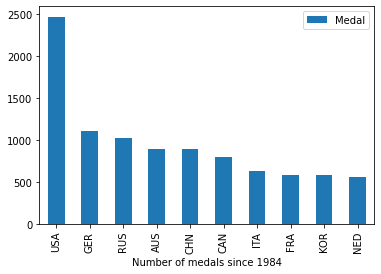

In [96]:
plot = top_10_df.plot(kind="bar")
plot.set_xlabel('Number of medals since 1984')

### Check your code

In [97]:
from nbresult import ChallengeResult

result = ChallengeResult('olympic_games',
    summer_countries_shape=summer_countries_df.shape,
    all_countries_shape=all_df.shape,
    top_country_1=top_10_df.iloc[0]['Medal'],
    top_country_10=top_10_df.iloc[9]['Medal'],
)
result.write()

In [98]:
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.6, pytest-6.2.3, py-1.10.0, pluggy-0.13.1 -- /Users/smrack/.pyenv/versions/3.8.6/envs/lewagon/bin/python3.8
cachedir: .pytest_cache
rootdir: /Users/smrack/code/olushO/data-challenges/02-Data-Toolkit/01-Data-Analysis/03-Multiple-Files-With-Pandas
plugins: anyio-2.2.0, dash-1.20.0
collecting ... collected 3 items

tests/test_olympic_games.py::TestOlympicGames::test_all_countries_df_shape PASSED [ 33%]
tests/test_olympic_games.py::TestOlympicGames::test_summer_countries_df_shape PASSED [ 66%]
tests/test_olympic_games.py::TestOlympicGames::test_top_10_countries_medals PASSED [100%]

============================== 3 passed in 0.32s ===============================


💯 You can commit your code:

git add tests/olympic_games.pickle

git commit -m 'Completed olympic_games step'

git push origin master
